<a href="https://colab.research.google.com/github/enzoulian/bootcamp-dsa-proj-modulo1/blob/main/notebooks/DSA_Projeto_M%C3%B3dulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*#bootcampdatascience #alura*

Este Colab é o **Projeto do Módulo 1** do **Bootcamp de Data Science Aplicada** ministrado pela **Alura**.

#Escopo da Análise

>Neste projeto, iremos explorar dados fornecidosp pelo **Ministério da Saúde** (SUS) e do **IBGE**, a fim de extrair informações relevantes na área da saúde.

>O objetivo é analisar o valor médio de uma AIH (*autorição de internação hospitalar*) durante o período de 2008 a 2020, e aplicar sobre ela a inflação ([IPCA](https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=o-que-e) - *Índice Nacional de Preços ao Consumidor Amplo*) nesse período.

# Fonte de Dados

## Custo médio de AIH - DataSUS

>Utilizamos o portal do [DataSUS](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi) para obter os dados.
>Os dados filtrados e baixados foram dados **Dados Consolidados AIH (RD), por local de internação, a partir de 2008**, na qual foram agrupados por **Unidades de Federação** e **Ano/mês processamento**, referente ao **Valor médio AIH**.

In [1823]:
import pandas as pd

In [1824]:
dados_custo = pd.read_csv('A144108189_28_143_208.csv', encoding='ISO-8859-1', skiprows=3, skipfooter=12 ,sep=';', thousands='.', decimal=',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [1825]:
dados_custo.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,335.230,401.490,357.040,355.970,364.880,363.250,405.460,424.360,415.240,432.300,403.460,443.510,447.950,381.300,470.320,457.660,446.040,461.440,473.360,442.480,459.710,471.120,463.670,459.710,430.370,432.600,474.560,491.620,517.090,556.050,577.560,536.030,577.470,533.160,545.520,527.370,550.470,488.960,514.080,...,846.740,895.640,859.700,862.140,806.830,818.580,855.540,884.250,776.170,847.740,876.840,890.360,963.300,846.200,904.110,880.390,851.580,760.220,919.820,898.920,860.680,1001.150,940.910,832.560,829.620,805.800,853.030,958.270,1027.870,1349.990,1415.620,1384.790,1145.390,974.300,1033.110,1092.350,1148.920,1196.130,1714.090,718.320
1,12 Acre,432.400,487.530,474.230,463.060,504.140,454.170,514.700,491.550,499.940,466.060,458.030,541.580,563.680,531.500,510.010,578.790,585.770,566.960,574.030,526.960,nan,602.790,548.320,587.360,564.610,533.280,568.640,560.690,631.320,563.890,546.170,622.200,586.950,578.280,568.380,620.540,647.570,620.800,569.540,...,776.170,751.250,778.940,720.640,681.710,814.550,789.900,749.720,706.310,756.780,884.760,819.540,811.410,656.940,815.070,794.080,776.550,773.830,738.300,794.690,784.970,734.380,831.920,825.160,880.500,835.830,815.700,771.990,930.700,954.320,1122.480,964.020,969.480,952.500,907.140,999.730,944.760,1012.720,1017.480,704.720
2,13 Amazonas,507.830,555.870,552.820,565.480,608.030,600.370,605.380,595.400,619.740,587.960,527.100,628.850,668.150,652.930,683.540,678.420,702.600,687.550,670.820,715.550,696.890,695.130,652.850,727.820,694.750,676.340,694.080,696.300,688.600,765.270,738.380,712.570,701.980,683.680,731.310,693.160,689.910,677.660,678.830,...,900.380,910.760,947.240,948.030,931.690,940.980,939.160,921.480,1001.010,1016.370,1012.840,936.320,962.590,936.460,972.790,973.270,966.700,977.390,936.570,980.430,973.560,944.030,974.000,941.420,978.820,965.180,928.810,1033.730,1375.900,1411.260,1313.240,1267.900,1166.840,1063.470,1318.900,1279.450,1476.220,1501.140,1389.600,851.520
3,14 Roraima,446.030,429.330,396.410,427.700,423.340,410.070,432.030,415.360,475.910,467.360,437.180,557.250,495.740,491.900,611.870,544.330,522.070,580.000,564.620,611.440,558.090,552.520,553.550,755.800,630.410,657.180,681.920,667.310,603.390,619.760,635.680,608.490,667.330,700.730,667.280,659.460,659.990,612.470,593.620,...,784.020,763.050,768.270,778.820,745.970,825.110,781.370,732.840,774.730,765.200,749.970,818.370,772.110,838.510,669.950,763.700,822.780,794.010,725.610,776.100,736.880,726.200,785.760,822.170,831.700,771.530,821.410,915.970,943.840,1195.310,1040.180,866.220,955.940,887.770,1054.160,988.120,1034.820,1065.310,1215.840,705.760
4,15 Pará,488.370,470.760,512.170,506.460,520.310,533.680,531.610,534.110,568.270,547.840,528.120,602.920,602.410,587.600,600.740,607.370,608.560,596.430,595.720,596.720,607.080,619.170,596.870,604.640,592.570,603.780,601.430,591.830,594.560,607.350,612.810,614.550,608.060,618.500,624.090,608.940,622.180,615.300,612.030,...,800.040,798.320,811.530,836.610,818.260,858.830,822.040,850.990,820.680,846.130,833.450,865.570,884.550,834.750,818.190,861.010,845.870,848.970,779.390,809.320,831.660,860.610,897.320,887.580,869.390,914.270,901.440,919.720,1103.310,1314.330,1223.880,1146.350,1020.740,997.540,1022.470,1029.080,1049.750,1104.390,1

In [1826]:
custo_inter = dados_custo

In [1827]:
custo_inter = custo_inter.set_index('Unidade da Federação')
custo_inter.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,335.230,401.490,357.040,355.970,364.880,363.250,405.460,424.360,415.240,432.300,403.460,443.510,447.950,381.300,470.320,457.660,446.040,461.440,473.360,442.480,459.710,471.120,463.670,459.710,430.370,432.600,474.560,491.620,517.090,556.050,577.560,536.030,577.470,533.160,545.520,527.370,550.470,488.960,514.080,581.120,...,846.740,895.640,859.700,862.140,806.830,818.580,855.540,884.250,776.170,847.740,876.840,890.360,963.300,846.200,904.110,880.390,851.580,760.220,919.820,898.920,860.680,1001.150,940.910,832.560,829.620,805.800,853.030,958.270,1027.870,1349.990,1415.620,1384.790,1145.390,974.300,1033.110,1092.350,1148.920,1196.130,1714.090,718.320
12 Acre,432.400,487.530,474.230,463.060,504.140,454.170,514.700,491.550,499.940,466.060,458.030,541.580,563.680,531.500,510.010,578.790,585.770,566.960,574.030,526.960,nan,602.790,548.320,587.360,564.610,533.280,568.640,560.690,631.320,563.890,546.170,622.200,586.950,578.280,568.380,620.540,647.570,620.800,569.540,608.650,...,776.170,751.250,778.940,720.640,681.710,814.550,789.900,749.720,706.310,756.780,884.760,819.540,811.410,656.940,815.070,794.080,776.550,773.830,738.300,794.690,784.970,734.380,831.920,825.160,880.500,835.830,815.700,771.990,930.700,954.320,1122.480,964.020,969.480,952.500,907.140,999.730,944.760,1012.720,1017.480,704.720
13 Amazonas,507.830,555.870,552.820,565.480,608.030,600.370,605.380,595.400,619.740,587.960,527.100,628.850,668.150,652.930,683.540,678.420,702.600,687.550,670.820,715.550,696.890,695.130,652.850,727.820,694.750,676.340,694.080,696.300,688.600,765.270,738.380,712.570,701.980,683.680,731.310,693.160,689.910,677.660,678.830,725.180,...,900.380,910.760,947.240,948.030,931.690,940.980,939.160,921.480,1001.010,1016.370,1012.840,936.320,962.590,936.460,972.790,973.270,966.700,977.390,936.570,980.430,973.560,944.030,974.000,941.420,978.820,965.180,928.810,1033.730,1375.900,1411.260,1313.240,1267.900,1166.840,1063.470,1318.900,1279.450,1476.220,1501.140,1389.600,851.520
14 Roraima,446.030,429.330,396.410,427.700,423.340,410.070,432.030,415.360,475.910,467.360,437.180,557.250,495.740,491.900,611.870,544.330,522.070,580.000,564.620,611.440,558.090,552.520,553.550,755.800,630.410,657.180,681.920,667.310,603.390,619.760,635.680,608.490,667.330,700.730,667.280,659.460,659.990,612.470,593.620,594.550,...,784.020,763.050,768.270,778.820,745.970,825.110,781.370,732.840,774.730,765.200,749.970,818.370,772.110,838.510,669.950,763.700,822.780,794.010,725.610,776.100,736.880,726.200,785.760,822.170,831.700,771.530,821.410,915.970,943.840,1195.310,1040.180,866.220,955.940,887.770,1054.160,988.120,1034.820,1065.310,1215.840,705.760
15 Pará,488.370,470.760,512.170,506.460,520.310,533.680,531.610,534.110,568.270,547.840,528.120,602.920,602.410,587.600,600.740,607.370,608.560,596.430,595.720,596.720,607.080,619.170,596.870,604.640,592.570,603.780,601.430,591.830,594.560,607.350,612.810,614.550,608.060,618.500,624.090,608.940,622.180,615.300,612.030,637.790,...,800.040,798.320,811.530,836.610,818.260,858.830,822.040,850.990,820.680,846.130,833.450,865.570,884.550,834.750,818.190,861.010,845.870,848.970,779.390,809.320,831.660,860.610,897.320,887.580,86

In [1828]:
custo_inter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 Rondônia to 53 Distrito Federal
Columns: 160 entries, 2008/Jan to Total
dtypes: float64(160)
memory usage: 34.0+ KB


In [1829]:
custo_inter.dtypes

2008/Jan    float64
2008/Fev    float64
2008/Mar    float64
2008/Abr    float64
2008/Mai    float64
             ...   
2020/Dez    float64
2021/Jan    float64
2021/Fev    float64
2021/Mar    float64
Total       float64
Length: 160, dtype: object

In [1830]:
custo_inter.isnull().sum().sum()

1

In [1831]:
custo_inter.isna().sum().sum()

1

In [1832]:
pd.options.display.float_format = "{:.3f}".format

In [1833]:
custo_inter.head() 

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,335.230,401.490,357.040,355.970,364.880,363.250,405.460,424.360,415.240,432.300,403.460,443.510,447.950,381.300,470.320,457.660,446.040,461.440,473.360,442.480,459.710,471.120,463.670,459.710,430.370,432.600,474.560,491.620,517.090,556.050,577.560,536.030,577.470,533.160,545.520,527.370,550.470,488.960,514.080,581.120,...,846.740,895.640,859.700,862.140,806.830,818.580,855.540,884.250,776.170,847.740,876.840,890.360,963.300,846.200,904.110,880.390,851.580,760.220,919.820,898.920,860.680,1001.150,940.910,832.560,829.620,805.800,853.030,958.270,1027.870,1349.990,1415.620,1384.790,1145.390,974.300,1033.110,1092.350,1148.920,1196.130,1714.090,718.320
12 Acre,432.400,487.530,474.230,463.060,504.140,454.170,514.700,491.550,499.940,466.060,458.030,541.580,563.680,531.500,510.010,578.790,585.770,566.960,574.030,526.960,nan,602.790,548.320,587.360,564.610,533.280,568.640,560.690,631.320,563.890,546.170,622.200,586.950,578.280,568.380,620.540,647.570,620.800,569.540,608.650,...,776.170,751.250,778.940,720.640,681.710,814.550,789.900,749.720,706.310,756.780,884.760,819.540,811.410,656.940,815.070,794.080,776.550,773.830,738.300,794.690,784.970,734.380,831.920,825.160,880.500,835.830,815.700,771.990,930.700,954.320,1122.480,964.020,969.480,952.500,907.140,999.730,944.760,1012.720,1017.480,704.720
13 Amazonas,507.830,555.870,552.820,565.480,608.030,600.370,605.380,595.400,619.740,587.960,527.100,628.850,668.150,652.930,683.540,678.420,702.600,687.550,670.820,715.550,696.890,695.130,652.850,727.820,694.750,676.340,694.080,696.300,688.600,765.270,738.380,712.570,701.980,683.680,731.310,693.160,689.910,677.660,678.830,725.180,...,900.380,910.760,947.240,948.030,931.690,940.980,939.160,921.480,1001.010,1016.370,1012.840,936.320,962.590,936.460,972.790,973.270,966.700,977.390,936.570,980.430,973.560,944.030,974.000,941.420,978.820,965.180,928.810,1033.730,1375.900,1411.260,1313.240,1267.900,1166.840,1063.470,1318.900,1279.450,1476.220,1501.140,1389.600,851.520
14 Roraima,446.030,429.330,396.410,427.700,423.340,410.070,432.030,415.360,475.910,467.360,437.180,557.250,495.740,491.900,611.870,544.330,522.070,580.000,564.620,611.440,558.090,552.520,553.550,755.800,630.410,657.180,681.920,667.310,603.390,619.760,635.680,608.490,667.330,700.730,667.280,659.460,659.990,612.470,593.620,594.550,...,784.020,763.050,768.270,778.820,745.970,825.110,781.370,732.840,774.730,765.200,749.970,818.370,772.110,838.510,669.950,763.700,822.780,794.010,725.610,776.100,736.880,726.200,785.760,822.170,831.700,771.530,821.410,915.970,943.840,1195.310,1040.180,866.220,955.940,887.770,1054.160,988.120,1034.820,1065.310,1215.840,705.760
15 Pará,488.370,470.760,512.170,506.460,520.310,533.680,531.610,534.110,568.270,547.840,528.120,602.920,602.410,587.600,600.740,607.370,608.560,596.430,595.720,596.720,607.080,619.170,596.870,604.640,592.570,603.780,601.430,591.830,594.560,607.350,612.810,614.550,608.060,618.500,624.090,608.940,622.180,615.300,612.030,637.790,...,800.040,798.320,811.530,836.610,818.260,858.830,822.040,850.990,820.680,846.130,833.450,865.570,884.550,834.750,818.190,861.010,845.870,848.970,779.390,809.320,831.660,860.610,897.320,887.580,86

In [1834]:
custos_ordenados = custo_inter.sort_values(by='Total', ascending=False)
custos_ordenados = custos_ordenados[custos_ordenados.columns[:-15]]

In [1835]:
custo_inter = custo_inter[custo_inter.columns[:-15]]

In [1836]:
custos_ordenados.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41 Paraná,747.680,869.490,829.310,839.580,872.140,892.760,897.890,895.940,900.880,882.070,888.940,1026.660,1019.260,975.290,986.850,978.530,986.340,1016.080,1025.710,1028.580,997.880,1000.910,1027.160,1032.730,1043.940,1004.370,1048.670,1040.280,1054.250,1060.150,1067.730,1089.260,1074.440,1078.090,1117.820,1133.580,1129.260,1121.660,1124.150,1136.520,...,1527.040,1525.870,1576.880,1579.460,1540.570,1558.210,1574.490,1541.520,1571.890,1607.590,1601.610,1544.530,1584.270,1580.030,1601.910,1638.090,1592.090,1591.350,1607.370,1627.910,1649.780,1640.320,1691.840,1654.780,1658.620,1654.900,1660.100,1659.180,1657.380,1662.690,1629.760,1637.860,1682.170,1645.860,1678.010,1673.030,1723.570,1686.940,1663.060,1661.040
42 Santa Catarina,695.590,825.490,844.790,865.820,848.700,885.430,918.090,935.680,912.400,937.090,868.180,1004.640,1092.240,966.680,1012.080,1030.700,1048.040,1049.010,1078.560,1094.280,1066.240,1041.740,1105.280,1129.270,1106.990,1035.440,1038.010,1147.520,1108.490,1137.840,1137.140,1150.520,1155.960,1184.350,1201.830,1132.610,1172.660,1130.940,1141.090,1169.750,...,1452.810,1414.130,1391.520,1524.440,1398.910,1435.650,1443.760,1442.290,1417.380,1389.320,1444.740,1409.580,1430.820,1415.010,1409.020,1488.540,1351.570,1399.900,1447.410,1446.640,1442.570,1422.420,1445.110,1488.420,1506.610,1500.660,1450.030,1437.700,1466.150,1451.750,1473.750,1454.800,1471.730,1465.840,1524.330,1516.340,1496.300,1458.020,1531.050,1500.270
43 Rio Grande do Sul,741.240,885.800,837.450,879.310,848.640,893.860,876.050,880.400,899.530,862.860,933.640,989.790,1052.490,1044.530,1003.670,990.890,993.250,1008.850,1005.250,1031.320,1054.700,1045.040,1041.140,1070.860,1123.210,1076.580,1033.570,1089.190,1065.390,1079.420,1081.920,1089.610,1094.890,1104.710,1112.760,1100.810,1093.150,1104.880,1113.390,1097.600,...,1480.210,1390.680,1398.980,1356.760,1323.980,1365.100,1371.670,1429.980,1376.250,1423.840,1396.840,1447.930,1429.640,1443.050,1365.860,1467.350,1417.400,1403.050,1422.140,1402.030,1455.430,1382.970,1448.750,1465.020,1427.690,1512.900,1486.830,1497.810,1496.760,1411.770,1518.020,1425.900,1403.680,1491.840,1460.820,1449.360,1484.380,1490.670,1472.380,1479.640
31 Minas Gerais,676.530,765.230,807.060,802.950,819.820,868.260,849.520,843.040,844.940,844.790,828.020,960.600,999.110,998.700,978.470,979.590,993.700,1004.230,1044.030,1021.860,1013.520,1020.840,1058.190,1052.860,1051.470,1020.750,1030.430,1046.940,1037.880,1068.320,1072.170,1065.540,1066.920,1072.880,1094.760,1112.110,1077.670,1114.600,1093.180,1110.290,...,1375.510,1421.770,1455.020,1440.250,1431.290,1435.960,1407.780,1417.350,1413.950,1425.460,1471.850,1440.690,1438.760,1447.110,1434.400,1433.490,1433.510,1411.640,1410.450,1425.800,1440.170,1457.920,1445.630,1466.290,1438.900,1433.610,1447.720,1485.540,1452.280,1451.100,1436.560,1409.690,1429.420,1473.200,1477.680,1463.480,1486.890,1474.970,1504.030,1487.710
35 São Paulo,731.320,885.330,855.060,840.870,876.600,905.890,902.300,889.830,897.750,866.380,898.580,1020.730,1043.170,1037.230,1025.730,1026.950,1034.670,1051.200,1046.230,1101.880,1039.660,1064.220,1065.280,1076.250,1073.050,1062.860,1063.990,1078.760,1085.790,1091.830

In [1837]:
custo_inter_sp = custo_inter.loc[['35 São Paulo']]

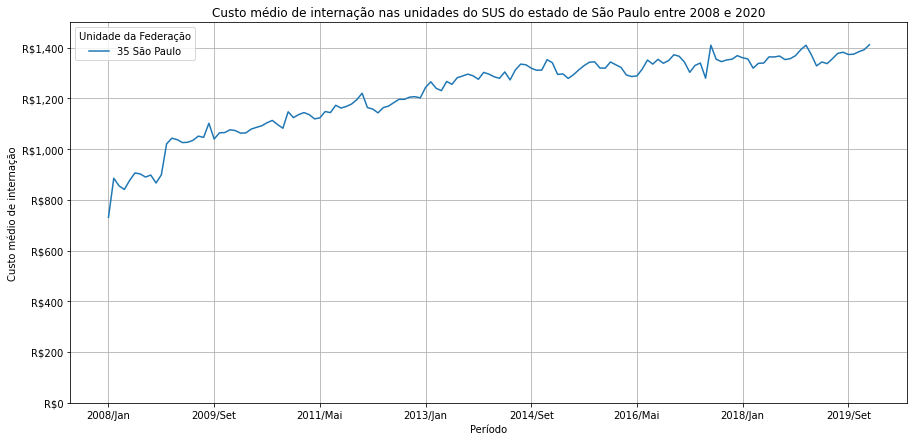

In [1838]:
ax = custo_inter_sp.T.plot(figsize=(15,7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.0f}'))
plt.xlabel('Período')
plt.ylabel('Custo médio de internação')
plt.grid(axis='both')
plt.title('Custo médio de internação nas unidades do SUS do estado de São Paulo entre 2008 e 2020')
plt.ylim(0,1500)
plt.show()

In [1839]:
custo_inter_sp = custo_inter_sp.rename(index={'35 São Paulo':'Custos'})

# Dados IPCA

Índice acumulado (%) nos últimos 12 meses

In [1840]:
dados_ipca = pd.read_csv('tabela1737.csv', skiprows=3, skipfooter=13 ,sep=';', thousands='.', decimal=',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [1841]:
dados_ipca = dados_ipca.rename(columns={'Unnamed: 0':'Local'})

In [1842]:
ipca = dados_ipca.set_index('Local')

In [1843]:
ipca = ipca/100

In [1844]:
ipca = ipca[ipca.columns[:-15]]

In [1845]:
ipca = ipca.rename(index={'Brasil':'IPCA'})

In [1846]:
ipca

,janeiro 2008,fevereiro 2008,março 2008,abril 2008,maio 2008,junho 2008,julho 2008,agosto 2008,setembro 2008,outubro 2008,novembro 2008,dezembro 2008,janeiro 2009,fevereiro 2009,março 2009,abril 2009,maio 2009,junho 2009,julho 2009,agosto 2009,setembro 2009,outubro 2009,novembro 2009,dezembro 2009,janeiro 2010,fevereiro 2010,março 2010,abril 2010,maio 2010,junho 2010,julho 2010,agosto 2010,setembro 2010,outubro 2010,novembro 2010,dezembro 2010,janeiro 2011,fevereiro 2011,março 2011,abril 2011,...,outubro 2016,novembro 2016,dezembro 2016,janeiro 2017,fevereiro 2017,março 2017,abril 2017,maio 2017,junho 2017,julho 2017,agosto 2017,setembro 2017,outubro 2017,novembro 2017,dezembro 2017,janeiro 2018,fevereiro 2018,março 2018,abril 2018,maio 2018,junho 2018,julho 2018,agosto 2018,setembro 2018,outubro 2018,novembro 2018,dezembro 2018,janeiro 2019,fevereiro 2019,março 2019,abril 2019,maio 2019,junho 2019,julho 2019,agosto 2019,setembro 2019,outubro 2019,novembro 2019,dezembro 2019,janeiro 2020
Local,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IPCA,0.046,0.046,0.047,0.050,0.056,0.061,0.064,0.062,0.062,0.064,0.064,0.059,0.058,0.059,0.056,0.055,0.052,0.048,0.045,0.044,0.043,0.042,0.042,0.043,0.046,0.048,0.052,0.053,0.052,0.048,0.046,0.045,0.047,0.052,0.056,0.059,0.060,0.060,0.063,0.065,...,0.079,0.070,0.063,0.053,0.048,0.046,0.041,0.036,0.030,0.027,0.025,0.025,0.027,0.028,0.030,0.029,0.028,0.027,0.028,0.029,0.044,0.045,0.042,0.045,0.046,0.041,0.037,0.038,0.039,0.046,0.049,0.047,0.034,0.032,0.034,0.029,0.025,0.033,0.043,0.042


In [1847]:
ipca = pd.DataFrame(data=ipca.values, columns=custo_inter_sp.columns)

In [1848]:
ipca

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan
0,0.046,0.046,0.047,0.050,0.056,0.061,0.064,0.062,0.062,0.064,0.064,0.059,0.058,0.059,0.056,0.055,0.052,0.048,0.045,0.044,0.043,0.042,0.042,0.043,0.046,0.048,0.052,0.053,0.052,0.048,0.046,0.045,0.047,0.052,0.056,0.059,0.060,0.060,0.063,0.065,...,0.079,0.070,0.063,0.053,0.048,0.046,0.041,0.036,0.030,0.027,0.025,0.025,0.027,0.028,0.030,0.029,0.028,0.027,0.028,0.029,0.044,0.045,0.042,0.045,0.046,0.041,0.037,0.038,0.039,0.046,0.049,0.047,0.034,0.032,0.034,0.029,0.025,0.033,0.043,0.042


In [1849]:
custo_ipca = pd.concat([ipca,custo_inter_sp])

In [1850]:
custo_ipca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 0 to Custos
Columns: 145 entries, 2008/Jan to 2020/Jan
dtypes: float64(145)
memory usage: 2.3+ KB


In [1851]:
custo_ipca.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan
0,0.046,0.046,0.047,0.050,0.056,0.061,0.064,0.062,0.062,0.064,0.064,0.059,0.058,0.059,0.056,0.055,0.052,0.048,0.045,0.044,0.043,0.042,0.042,0.043,0.046,0.048,0.052,0.053,0.052,0.048,0.046,0.045,0.047,0.052,0.056,0.059,0.060,0.060,0.063,0.065,...,0.079,0.070,0.063,0.053,0.048,0.046,0.041,0.036,0.030,0.027,0.025,0.025,0.027,0.028,0.030,0.029,0.028,0.027,0.028,0.029,0.044,0.045,0.042,0.045,0.046,0.041,0.037,0.038,0.039,0.046,0.049,0.047,0.034,0.032,0.034,0.029,0.025,0.033,0.043,0.042
Custos,731.320,885.330,855.060,840.870,876.600,905.890,902.300,889.830,897.750,866.380,898.580,1020.730,1043.170,1037.230,1025.730,1026.950,1034.670,1051.200,1046.230,1101.880,1039.660,1064.220,1065.280,1076.250,1073.050,1062.860,1063.990,1078.760,1085.790,1091.830,1103.950,1113.140,1096.750,1082.260,1147.220,1124.140,1136.250,1144.110,1135.810,1119.220,...,1338.490,1349.080,1371.930,1365.960,1343.080,1302.650,1329.920,1339.420,1279.560,1409.580,1354.370,1344.810,1351.590,1354.380,1368.500,1360.140,1355.280,1319.180,1338.280,1339.320,1363.600,1363.320,1366.960,1353.100,1356.360,1368.260,1391.500,1409.640,1372.440,1328.060,1343.550,1336.950,1356.480,1377.270,1381.960,1372.970,1374.070,1383.950,1391.750,1411.310


In [1852]:
custo_ipca = custo_ipca.rename(index={0:'IPCA'})

In [1853]:
custo_ipca

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan
IPCA,0.046,0.046,0.047,0.050,0.056,0.061,0.064,0.062,0.062,0.064,0.064,0.059,0.058,0.059,0.056,0.055,0.052,0.048,0.045,0.044,0.043,0.042,0.042,0.043,0.046,0.048,0.052,0.053,0.052,0.048,0.046,0.045,0.047,0.052,0.056,0.059,0.060,0.060,0.063,0.065,...,0.079,0.070,0.063,0.053,0.048,0.046,0.041,0.036,0.030,0.027,0.025,0.025,0.027,0.028,0.030,0.029,0.028,0.027,0.028,0.029,0.044,0.045,0.042,0.045,0.046,0.041,0.037,0.038,0.039,0.046,0.049,0.047,0.034,0.032,0.034,0.029,0.025,0.033,0.043,0.042
Custos,731.320,885.330,855.060,840.870,876.600,905.890,902.300,889.830,897.750,866.380,898.580,1020.730,1043.170,1037.230,1025.730,1026.950,1034.670,1051.200,1046.230,1101.880,1039.660,1064.220,1065.280,1076.250,1073.050,1062.860,1063.990,1078.760,1085.790,1091.830,1103.950,1113.140,1096.750,1082.260,1147.220,1124.140,1136.250,1144.110,1135.810,1119.220,...,1338.490,1349.080,1371.930,1365.960,1343.080,1302.650,1329.920,1339.420,1279.560,1409.580,1354.370,1344.810,1351.590,1354.380,1368.500,1360.140,1355.280,1319.180,1338.280,1339.320,1363.600,1363.320,1366.960,1353.100,1356.360,1368.260,1391.500,1409.640,1372.440,1328.060,1343.550,1336.950,1356.480,1377.270,1381.960,1372.970,1374.070,1383.950,1391.750,1411.310


In [1854]:
custo_ipca.prod()

2008/Jan   33.348
2008/Fev   40.814
2008/Mar   40.444
2008/Abr   42.380
2008/Mai   48.914
            ...  
2019/Set   39.679
2019/Out   34.901
2019/Nov   45.255
2019/Dez   59.984
2020/Jan   59.134
Length: 145, dtype: float64

# Resultados

In [1855]:
custo_real = custo_ipca.loc['Custos'] + custo_ipca.prod(axis=0)
custo_ipca_diff = custo_ipca.append(custo_real, ignore_index=True)

In [1856]:
custo_diff = custo_ipca.prod(axis=0)
custo_ipca_diff = custo_ipca_diff.append(custo_diff, ignore_index=True)

In [1857]:
#custo_ipca_diff = custo_ipca_diff.loc[1:2]
ipca_diff = custo_ipca.loc['IPCA']

In [1858]:
custo_ipca_diff

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan
0,0.046,0.046,0.047,0.050,0.056,0.061,0.064,0.062,0.062,0.064,0.064,0.059,0.058,0.059,0.056,0.055,0.052,0.048,0.045,0.044,0.043,0.042,0.042,0.043,0.046,0.048,0.052,0.053,0.052,0.048,0.046,0.045,0.047,0.052,0.056,0.059,0.060,0.060,0.063,0.065,...,0.079,0.070,0.063,0.053,0.048,0.046,0.041,0.036,0.030,0.027,0.025,0.025,0.027,0.028,0.030,0.029,0.028,0.027,0.028,0.029,0.044,0.045,0.042,0.045,0.046,0.041,0.037,0.038,0.039,0.046,0.049,0.047,0.034,0.032,0.034,0.029,0.025,0.033,0.043,0.042
1,731.320,885.330,855.060,840.870,876.600,905.890,902.300,889.830,897.750,866.380,898.580,1020.730,1043.170,1037.230,1025.730,1026.950,1034.670,1051.200,1046.230,1101.880,1039.660,1064.220,1065.280,1076.250,1073.050,1062.860,1063.990,1078.760,1085.790,1091.830,1103.950,1113.140,1096.750,1082.260,1147.220,1124.140,1136.250,1144.110,1135.810,1119.220,...,1338.490,1349.080,1371.930,1365.960,1343.080,1302.650,1329.920,1339.420,1279.560,1409.580,1354.370,1344.810,1351.590,1354.380,1368.500,1360.140,1355.280,1319.180,1338.280,1339.320,1363.600,1363.320,1366.960,1353.100,1356.360,1368.260,1391.500,1409.640,1372.440,1328.060,1343.550,1336.950,1356.480,1377.270,1381.960,1372.970,1374.070,1383.950,1391.750,1411.310
2,764.668,926.144,895.504,883.250,925.514,960.787,959.777,944.733,953.859,921.915,955.999,1080.953,1104.091,1098.427,1083.273,1083.740,1088.473,1101.658,1093.310,1149.922,1084.781,1108.598,1110.235,1122.636,1122.303,1114.196,1118.998,1135.503,1142.468,1144.675,1154.732,1163.120,1148.297,1138.538,1211.808,1190.577,1204.311,1212.871,1207.366,1192.081,...,1443.829,1443.381,1458.224,1439.039,1407.011,1362.181,1384.181,1387.639,1317.947,1447.780,1387.688,1378.968,1388.083,1392.303,1408.871,1399.040,1393.770,1354.534,1375.217,1377.625,1423.462,1424.397,1424.236,1414.395,1418.210,1423.675,1443.681,1462.924,1425.828,1388.885,1409.921,1399.252,1402.193,1421.618,1429.361,1412.649,1408.971,1429.205,1451.734,1470.444
3,33.348,40.814,40.444,42.380,48.914,54.897,57.477,54.903,56.109,55.535,57.419,60.223,60.921,61.197,57.543,56.790,53.803,50.458,47.080,48.042,45.121,44.378,44.955,46.386,49.253,51.336,55.008,56.743,56.678,52.845,50.782,49.980,51.547,56.278,64.588,66.437,68.061,68.761,71.556,72.861,...,105.339,94.301,86.294,73.079,63.931,59.531,54.261,48.219,38.387,38.200,33.318,34.158,36.493,37.923,40.371,38.900,38.490,35.354,36.937,38.305,59.862,61.077,57.276,61.295,61.850,55.415,52.181,53.284,53.388,60.825,66.371,62.302,45.713,44.348,47.401,39.679,34.901,45.255,59.984,59.134


In [1859]:
ipca_diff

2008/Jan   0.046
2008/Fev   0.046
2008/Mar   0.047
2008/Abr   0.050
2008/Mai   0.056
            ... 
2019/Set   0.029
2019/Out   0.025
2019/Nov   0.033
2019/Dez   0.043
2020/Jan   0.042
Name: IPCA, Length: 145, dtype: float64

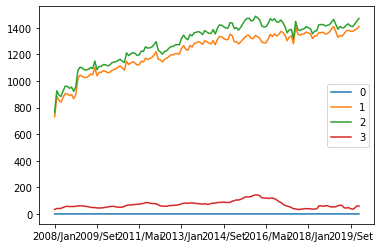

In [1860]:
custo_ipca_diff.T.plot()

In [1899]:
slc_custo = custo_ipca_diff.loc[1]
slc_real = custo_ipca_diff.loc[2]
slc_ipca = custo_ipca.loc['IPCA']
slc_ipca_vlr = custo_ipca_diff.loc[3]

In [1900]:
custo_ipca_comp = custo_ipca_diff.loc[1:2]

In [1962]:
custo_ipca_comp = custo_ipca_comp.rename(index={1:'Custo Médio', 2:'Custo Médio Real'})

In [1963]:
custo_ipca_comp

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan
Custo Médio,731.320,885.330,855.060,840.870,876.600,905.890,902.300,889.830,897.750,866.380,898.580,1020.730,1043.170,1037.230,1025.730,1026.950,1034.670,1051.200,1046.230,1101.880,1039.660,1064.220,1065.280,1076.250,1073.050,1062.860,1063.990,1078.760,1085.790,1091.830,1103.950,1113.140,1096.750,1082.260,1147.220,1124.140,1136.250,1144.110,1135.810,1119.220,...,1338.490,1349.080,1371.930,1365.960,1343.080,1302.650,1329.920,1339.420,1279.560,1409.580,1354.370,1344.810,1351.590,1354.380,1368.500,1360.140,1355.280,1319.180,1338.280,1339.320,1363.600,1363.320,1366.960,1353.100,1356.360,1368.260,1391.500,1409.640,1372.440,1328.060,1343.550,1336.950,1356.480,1377.270,1381.960,1372.970,1374.070,1383.950,1391.750,1411.310
Custo Médio Real,764.668,926.144,895.504,883.250,925.514,960.787,959.777,944.733,953.859,921.915,955.999,1080.953,1104.091,1098.427,1083.273,1083.740,1088.473,1101.658,1093.310,1149.922,1084.781,1108.598,1110.235,1122.636,1122.303,1114.196,1118.998,1135.503,1142.468,1144.675,1154.732,1163.120,1148.297,1138.538,1211.808,1190.577,1204.311,1212.871,1207.366,1192.081,...,1443.829,1443.381,1458.224,1439.039,1407.011,1362.181,1384.181,1387.639,1317.947,1447.780,1387.688,1378.968,1388.083,1392.303,1408.871,1399.040,1393.770,1354.534,1375.217,1377.625,1423.462,1424.397,1424.236,1414.395,1418.210,1423.675,1443.681,1462.924,1425.828,1388.885,1409.921,1399.252,1402.193,1421.618,1429.361,1412.649,1408.971,1429.205,1451.734,1470.444


In [1911]:
custo_ipca_vlr = custo_ipca_diff.loc[[0]]
custo_ipca_vlr = custo_ipca_vlr.append(custo_ipca_diff.loc[3])

In [1954]:
custo_ipca_vlr = custo_ipca_vlr.rename(index={0:'Taxa IPCA', 3:'Taxa em Reais'})

In [1957]:
custo_ipca_vlr.loc['Taxa IPCA'] = custo_ipca_vlr.loc['Taxa IPCA'] * 100

In [1958]:
custo_ipca_vlr

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan
Taxa IPCA,4.560,4.610,4.730,5.040,5.580,6.060,6.370,6.170,6.250,6.410,6.390,5.900,5.840,5.900,5.610,5.530,5.200,4.800,4.500,4.360,4.340,4.170,4.220,4.310,4.590,4.830,5.170,5.260,5.220,4.840,4.600,4.490,4.700,5.200,5.630,5.910,5.990,6.010,6.300,6.510,...,7.870,6.990,6.290,5.350,4.760,4.570,4.080,3.600,3.000,2.710,2.460,2.540,2.700,2.800,2.950,2.860,2.840,2.680,2.760,2.860,4.390,4.480,4.190,4.530,4.560,4.050,3.750,3.780,3.890,4.580,4.940,4.660,3.370,3.220,3.430,2.890,2.540,3.270,4.310,4.190
Valor,33.348,40.814,40.444,42.380,48.914,54.897,57.477,54.903,56.109,55.535,57.419,60.223,60.921,61.197,57.543,56.790,53.803,50.458,47.080,48.042,45.121,44.378,44.955,46.386,49.253,51.336,55.008,56.743,56.678,52.845,50.782,49.980,51.547,56.278,64.588,66.437,68.061,68.761,71.556,72.861,...,105.339,94.301,86.294,73.079,63.931,59.531,54.261,48.219,38.387,38.200,33.318,34.158,36.493,37.923,40.371,38.900,38.490,35.354,36.937,38.305,59.862,61.077,57.276,61.295,61.850,55.415,52.181,53.284,53.388,60.825,66.371,62.302,45.713,44.348,47.401,39.679,34.901,45.255,59.984,59.134


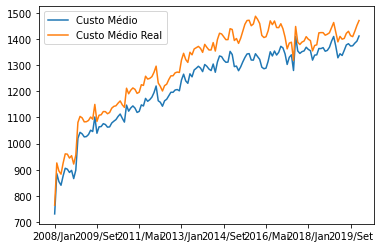

In [1964]:
custo_ipca_comp.T.plot()

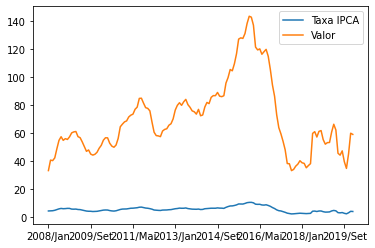

In [1959]:
custo_ipca_vlr.T.plot()

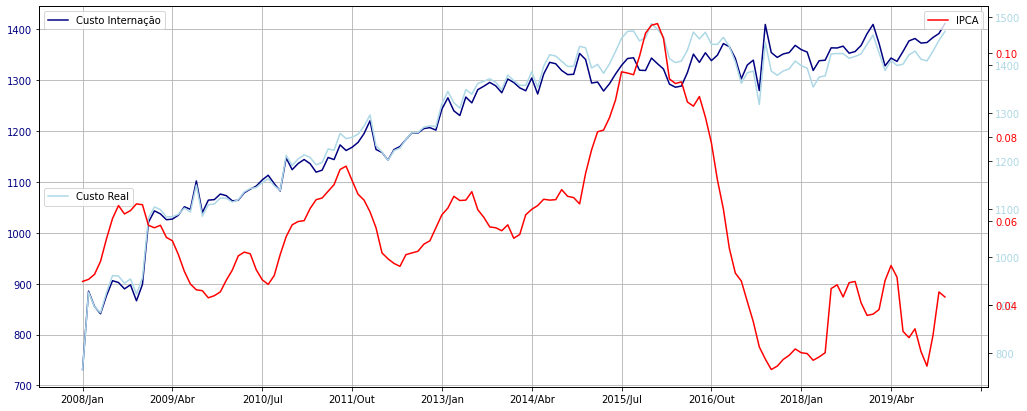

In [1960]:
fig, ax = plt.subplots(figsize=(17,7))

# Custo Internação
ax.plot(slc_custo, color='navy', label='Custo Internação')
ax.tick_params(axis='y', labelcolor='navy')
ax.legend(loc="upper left")

ax2 = ax.twinx()

# Custo Real
ax2.plot(slc_real, color='lightblue', label='Custo Real')
#ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='lightblue')
ax2.legend(loc="center left")

ax3 = ax.twinx()

ax3.plot(slc_ipca, color='red', label='IPCA')
ax3.tick_params(axis='y', labelcolor='red')
ax3.legend(loc="upper right")

M = 15
yticks = ticker.MaxNLocator(M)
ax.xaxis.set_major_locator(yticks)
ax.xaxis.grid('x')
ax.yaxis.grid('y')


plt.show()

In [1897]:
custo_ipca_diff

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan
0,0.046,0.046,0.047,0.050,0.056,0.061,0.064,0.062,0.062,0.064,0.064,0.059,0.058,0.059,0.056,0.055,0.052,0.048,0.045,0.044,0.043,0.042,0.042,0.043,0.046,0.048,0.052,0.053,0.052,0.048,0.046,0.045,0.047,0.052,0.056,0.059,0.060,0.060,0.063,0.065,...,0.079,0.070,0.063,0.053,0.048,0.046,0.041,0.036,0.030,0.027,0.025,0.025,0.027,0.028,0.030,0.029,0.028,0.027,0.028,0.029,0.044,0.045,0.042,0.045,0.046,0.041,0.037,0.038,0.039,0.046,0.049,0.047,0.034,0.032,0.034,0.029,0.025,0.033,0.043,0.042
1,731.320,885.330,855.060,840.870,876.600,905.890,902.300,889.830,897.750,866.380,898.580,1020.730,1043.170,1037.230,1025.730,1026.950,1034.670,1051.200,1046.230,1101.880,1039.660,1064.220,1065.280,1076.250,1073.050,1062.860,1063.990,1078.760,1085.790,1091.830,1103.950,1113.140,1096.750,1082.260,1147.220,1124.140,1136.250,1144.110,1135.810,1119.220,...,1338.490,1349.080,1371.930,1365.960,1343.080,1302.650,1329.920,1339.420,1279.560,1409.580,1354.370,1344.810,1351.590,1354.380,1368.500,1360.140,1355.280,1319.180,1338.280,1339.320,1363.600,1363.320,1366.960,1353.100,1356.360,1368.260,1391.500,1409.640,1372.440,1328.060,1343.550,1336.950,1356.480,1377.270,1381.960,1372.970,1374.070,1383.950,1391.750,1411.310
2,764.668,926.144,895.504,883.250,925.514,960.787,959.777,944.733,953.859,921.915,955.999,1080.953,1104.091,1098.427,1083.273,1083.740,1088.473,1101.658,1093.310,1149.922,1084.781,1108.598,1110.235,1122.636,1122.303,1114.196,1118.998,1135.503,1142.468,1144.675,1154.732,1163.120,1148.297,1138.538,1211.808,1190.577,1204.311,1212.871,1207.366,1192.081,...,1443.829,1443.381,1458.224,1439.039,1407.011,1362.181,1384.181,1387.639,1317.947,1447.780,1387.688,1378.968,1388.083,1392.303,1408.871,1399.040,1393.770,1354.534,1375.217,1377.625,1423.462,1424.397,1424.236,1414.395,1418.210,1423.675,1443.681,1462.924,1425.828,1388.885,1409.921,1399.252,1402.193,1421.618,1429.361,1412.649,1408.971,1429.205,1451.734,1470.444
3,33.348,40.814,40.444,42.380,48.914,54.897,57.477,54.903,56.109,55.535,57.419,60.223,60.921,61.197,57.543,56.790,53.803,50.458,47.080,48.042,45.121,44.378,44.955,46.386,49.253,51.336,55.008,56.743,56.678,52.845,50.782,49.980,51.547,56.278,64.588,66.437,68.061,68.761,71.556,72.861,...,105.339,94.301,86.294,73.079,63.931,59.531,54.261,48.219,38.387,38.200,33.318,34.158,36.493,37.923,40.371,38.900,38.490,35.354,36.937,38.305,59.862,61.077,57.276,61.295,61.850,55.415,52.181,53.284,53.388,60.825,66.371,62.302,45.713,44.348,47.401,39.679,34.901,45.255,59.984,59.134


In [1865]:
#custo_ipca_diff = custo_ipca_diff.T
#ipca_diff = ipca_diff.T